# Project 2: Fitting the LMT Pointing Model


### 1: Background

   In this project we were asked to take a look at the pointing model for the Large Millimeter Telescope (LMT), which is a 50m-diameter telescope located in Mexico and run partially by the UMass Astronomy Department.
   
   The LMT works as an Azimuth-Elevation telescope, pointing to points in the sky using those two axes, which point up and orthogonally, respectively.
   
   Unfortunately, there are many technical limitations and considerations in such a system. In order to be properly precise with our measurements, we are required to have an accurace of 1 arcsecond in the movement of the LMT, and the mechanical construction of the telescope is simply not nearly precise enough for this. This is where our pointing model comes in. It is used to alleviate this.
   
### 2: Pointing Model Considerations

   For a precise pointing model, we need to keep the following measurements/defects in consideration:

* Knowledge of the precise location of 0 on the encoder which means the Azimuth/Elevation angle.
* Tilt of the Azimuth Axis with respect to Zenith
* Alignment of the telescope's optical axis with the mechanical structure.
* Non-orthogonality of the telescope's azimuth and elevation axes.
* Gravitational Bending of the mechanical system under changing gravity loads as it points to different angles
* Refraction by the Earth's atmosphere

 Even in a carefully built system (like the LMT) each of these effects is very large compared to our pointing
requirement. What is required is a way to measure the effects and determine the values of the parameters
that describe these effects.
(Taken from Project Description 2)


### 3: Pointing Model:

In order to improve the LMT's precision we fit a pointing model to observations of celestial sources at known positions in the sky. Careful measurements of postion of an object are made and then compared to its known position. The difference in these angles is call the pointing error.

This is our pointing model for the Azimuth, usiing five terms:

$$δAz = A_{1} + A_{2}sin(El) + A_{3}cos(El) + A_{4}sin(El)sin(Az) + A_{5}sin(El)cos(Az)$$

for Elevation:

$$δEl = E_{1} + E_{2}cot(El) + E_{3}cos(El) + E_{4}sin(El) + E_{5}cos(Az) + E_{6}sin(Az)$$


Using some Linear Algebra and Matrix transformations as described in Exercise 13, we can use this linear system in order to 


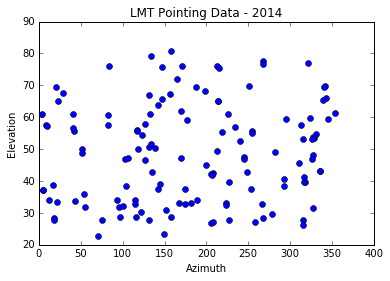

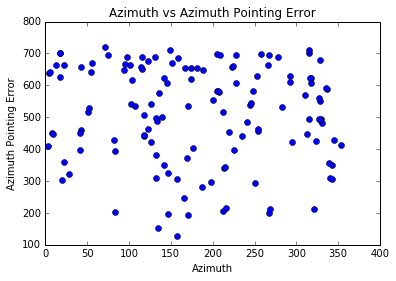

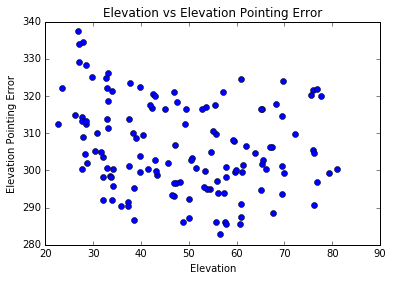

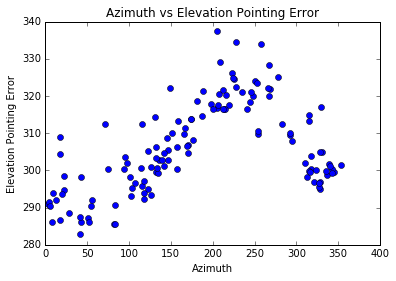

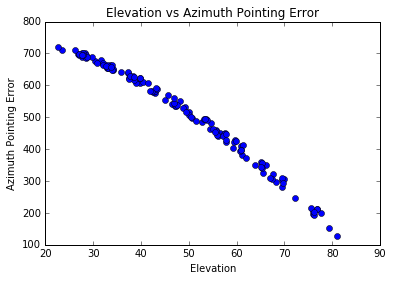

In [2]:
% matplotlib inline
import numpy as np
import csv
import math
import matplotlib.pyplot as pl
from numpy.linalg import inv

filename = 'PointingData.csv'

f = open(filename,'r')
r = csv.reader(f)

# create lists
AzList = []
ElList = []
AzOffList = []
AzErrList = []
ElOffList = []
ElErrList = []

for row in r:
    AzList.append(eval(row[4]))
    ElList.append(eval(row[5]))
    AzOffList.append(eval(row[6]))
    AzErrList.append(eval(row[7]))
    ElOffList.append(eval(row[8]))
    ElErrList.append(eval(row[9]))

# create numpy arrays
az = np.array(AzList)
el = np.array(ElList)
azoff = np.array(AzOffList)
azerr = np.array(AzErrList)
eloff = np.array(ElOffList)
elerr = np.array(ElErrList)
 
pl.plot(az,el,'o')
pl.xlabel('Azimuth')
pl.ylabel('Elevation')
pl.title('LMT Pointing Data - 2014')
pl.show()

pl.plot(az,azoff,'o')
pl.xlabel('Azimuth')
pl.ylabel('Azimuth Pointing Error')
pl.title('Azimuth vs Azimuth Pointing Error')
pl.show()

pl.plot(el,eloff,'o')
pl.xlabel('Elevation')
pl.ylabel('Elevation Pointing Error')
pl.title('Elevation vs Elevation Pointing Error')
pl.show()

pl.plot(az,eloff,'o')
pl.xlabel('Azimuth')
pl.ylabel('Elevation Pointing Error')
pl.title('Azimuth vs Elevation Pointing Error')
pl.show()

pl.plot(el,azoff,'o')
pl.xlabel('Elevation')
pl.ylabel('Azimuth Pointing Error')
pl.title('Elevation vs Azimuth Pointing Error')
pl.show()



For Elevation vs. Elevation pointing error, and Azimuth vs. Azimuth pointing error there does not seem to be much correlation, simply a scattered set of dots all across.

For Azimuth vs. Elevation Pointing error, there seems to be a trend similar to a negative absolute value graph, where the data reaches a point and then takes a sharp, symmetrical "bounce" back down.

For Elevation vs. Azimuth pointing error, there is an obvious trend with the pointing error decreasing as the elevation increased, in a close to very slightly parabolic fashion. 


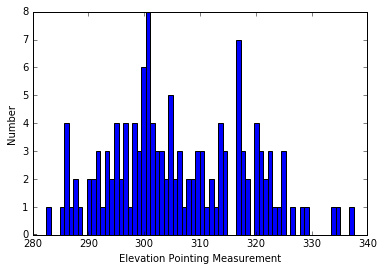

error=12.01528


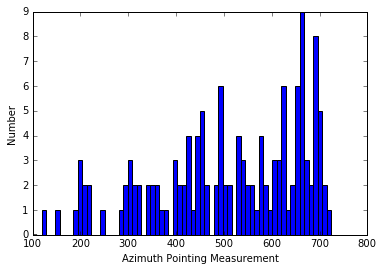

error=152.99989


In [13]:
my_bins = np.linspace(280.,340.,75)
pl.hist(eloff,bins=my_bins);
pl.xlabel('Elevation Pointing Measurement')
pl.ylabel('Number')
pl.show()
stdElev = eloff.std()
print('error={0:8.5f}'.format(stdElev))

my_bins2 = np.linspace(100.,800.,75)
pl.hist(azoff,bins=my_bins2);
pl.xlabel('Azimuth Pointing Measurement')
pl.ylabel('Number')
pl.show()
stdAzi = azoff.std()
print('error={0:8.5f}'.format(stdAzi))

At this point, neither of our histograms look as though they have much of a normal distribution, let alone one with a standard deviation of one arcsecond.

next up we must fit Least Linear Square for Azimuth and for Elevation. Must find parameters A1-A5 and E1-E6 using matrices.

Reminder that the equations for Azimuth and Elevation: 

$$δAz = A_{1} + A_{2}sin(El) + A_{3}cos(El) + A_{4}sin(El)sin(Az) + A_{5}sin(El)cos(Az)$$

$$δEl = E_{1} + E_{2}cot(El) + E_{3}cos(El) + E_{4}sin(El) + E_{5}cos(Az) + E_{6}sin(Az)$$


RMS = 2.007732
A1 = -0.328968 +/- 5.171486 
A2 = 25.015567 +/- 4.146305 
A3 = 774.086594 +/- 3.458537 
A4 = -7.320224 +/- 0.362313 
A5 = 14.434094 +/- 0.325706 


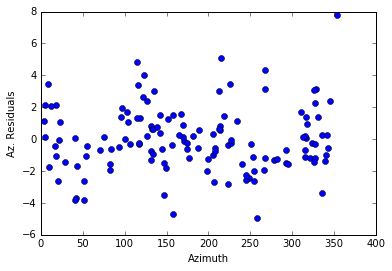

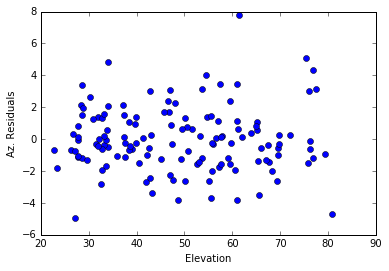

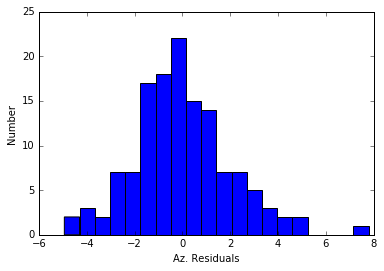

In [9]:
npar = 5         # number of parameters

nobs = len(azoff)    # number of observations

Y = azoff # same as our data array
azRad = az*np.pi/180
elRad = el*np.pi/180

# create M
M = np.column_stack( (np.ones(len(Y)),
                      np.sin(elRad),
                      np.cos(elRad),
                      np.sin(elRad)*np.sin(azRad),
                      np.sin(elRad)*np.cos(azRad)) )


# solve
MTM = np.dot(M.transpose(),M)
MTMINV = inv(MTM)
MTY = np.dot(M.transpose(),Y)

P = np.dot(MTMINV,MTY) # SOLUTION

# compute ChiSq, RMS and print it
Residuals = Y - np.dot(M,P)
ChiSq = np.dot(Residuals.transpose(),Residuals)
RMS = math.sqrt(ChiSq/nobs)
print('RMS = %f'%(RMS))

C = MTMINV * ChiSq/(nobs-npar)  # COVARIANCE MATRIX 

# print solution
print('A1 = %f +/- %f ' % (P[0],math.sqrt(C[0,0])))
print('A2 = %f +/- %f ' % (P[1],math.sqrt(C[1,1])))
print('A3 = %f +/- %f ' % (P[2],math.sqrt(C[2,2])))
print('A4 = %f +/- %f ' % (P[3],math.sqrt(C[3,3])))
print('A5 = %f +/- %f ' % (P[4],math.sqrt(C[4,4])))

pl.plot(az, Residuals, 'o')
pl.xlabel('Azimuth')
pl.ylabel('Az. Residuals')
pl.show()

pl.plot(el, Residuals, 'o')
pl.xlabel('Elevation')
pl.ylabel('Az. Residuals')
pl.show()

pl.hist(Residuals,bins=20);
pl.xlabel('Az. Residuals')
pl.ylabel('Number')
pl.show()



RMS = 3.733703
E1 = 216.481854 +/- 31.465189 
E2 = 42.089420 +/- 6.969798 
E3 = -23.063920 +/- 7.943366 
E4 = 84.801901 +/- 28.650468 
E5 = -9.752608 +/- 0.460973 
E6 = -12.471124 +/- 0.491388 


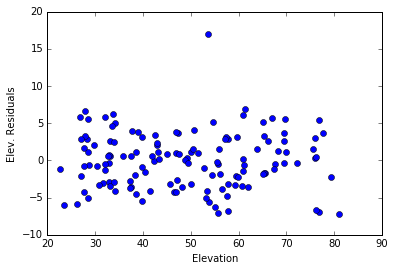

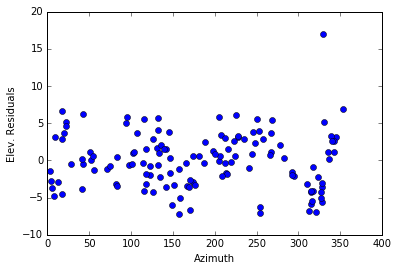

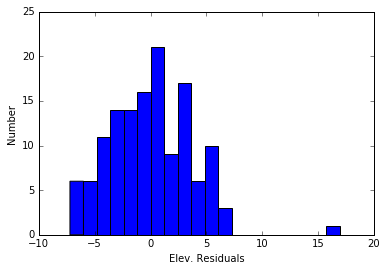

In [5]:
npar = 6         # number of parameters


Y = eloff # same as our data array
nobs = len(Y)

# create M
M = np.column_stack( (np.ones(len(Y)),
                      (1/np.tan(elRad)),
                      np.cos(elRad),
                      np.sin(elRad),
                      np.cos(azRad),
                      np.sin(azRad)) )

# solve
MTM = np.dot(M.transpose(),M)
MTMINV = inv(MTM)
MTY = np.dot(M.transpose(),Y)

P = np.dot(MTMINV,MTY) # SOLUTION

# compute ChiSq, RMS and print it
Residuals = Y - np.dot(M,P)
ChiSq = np.dot(Residuals.transpose(),Residuals)
RMS = math.sqrt(ChiSq/nobs)
print('RMS = %f'%(RMS))

C = MTMINV * ChiSq/(nobs-npar)  # COVARIANCE MATRIX 

# print solution
print('E1 = %f +/- %f ' % (P[0],math.sqrt(C[0,0])))
print('E2 = %f +/- %f ' % (P[1],math.sqrt(C[1,1])))
print('E3 = %f +/- %f ' % (P[2],math.sqrt(C[2,2])))
print('E4 = %f +/- %f ' % (P[3],math.sqrt(C[3,3])))
print('E5 = %f +/- %f ' % (P[4],math.sqrt(C[4,4])))
print('E6 = %f +/- %f ' % (P[5],math.sqrt(C[5,5])))

pl.plot(el, Residuals, 'o')
pl.xlabel('Elevation')
pl.ylabel('Elev. Residuals')
pl.show()

pl.plot(az, Residuals, 'o')
pl.xlabel('Azimuth')
pl.ylabel('Elev. Residuals')
pl.show()

pl.hist(Residuals,bins=20);
pl.xlabel('Elev. Residuals')
pl.ylabel('Number')
pl.show()



Comparing our new RMS values with the old errors we reached, we have made significant improvement in our error by fitting the model. In particular, our error for elevation decreased massively from its previous term, going from about 153 to only about 3.7. Our residuals now look like they follow more of a normal distribution. While our values for the residuals are not the same for Elevation and Azimuth, this makes sense as they are different variables with different potential points of error. Moreso, our data makes sense as points with larger measurement erros have larger residuals. Looking at our graphs for residuals vs. Elevation/Azimuth, it seems to me that we may have 1 or two errors we do not entirely account for, as the graphs related to azimuth have a bit of an odd overall shape when compared to the nice, relatively rectangular graphs of elevation. 

According to our data here, with an RMS of ~2 for Azimuth and one of ~3.7 for Elevation, I believe that our pointing model is strong enough to support observations with an 8 arcsecond beam, since these values of RMS are much smaller than 8 arcseconds 